In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# Введение

## Описание задачи
Я буду решать задачу регрессии: предсказывать цену продажи дома в округе Кинг на основе характеристик жилья. Данные покрывают сделки за период с мая 2014 до мая 2015 года

Отсюда первый важный момент – на цену продажи дома инфляция не будет существенно влиять. Если бы разброс в дате был сильнее, это необходимо было бы учитывать

**Что требуется сделать**
* Провести EDA и ресёрч-анализ: изучить признаки, визуализировать их распределения и связи с ценой
* Выполнить Feature Engineering: создать новые признаки, оценить их корреляцию и важность
* Построить простую модель и оценить ее
* Провести эксперименты с несколькими семействами моделей, оценить их по метрикам(выбрал MAE, RMSE, R2), сделать кросс-валидацию и выбрать лучшую

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

## Описание колонок

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Использовал describe, чтобы посмотреть, какие минимальные и максимальные значения столбцов представлены в датасете, это нужно в первую очередь для оценок(grade, condition, view)

* id: id записи
* date: Дата продажи
* price: Цена продажи дома в долларах США
* bedrooms: Количество спален
* bathrooms: Количество ванных комнат
* sqft_living: Площадь жилой части дома
* sqft_lot: Площадь участка
* floors: Число этажей
* waterfront: Находится ли дом на берегу (1 – да, 0 – нет)
* view: Оценка вида с дома (0–4)
* condition: Состояние дома (1 – плохо, 5 – отлично)
* grade: Качество и дизайн здания (1–13)
* sqft_above: Площадь дома без учёта цокольного этажа
* sqft_basement: Площадь цокольного этажа
* yr_built: Год постройки
* yr_renovated: Год последнего ремонта
* zipcode: Почтовый индекс
* lat: Географическая широта
* long: Географическая долгота
* sqft_living15: Средняя жилая площадь ближайших 15 домов
* sqft_lot15: Средняя площадь участка ближайших 15 домов

## Проверка на пропуски

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Данные очень чистые, пропусков нет совсем

## Проверка типов данных

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Все здесь является числом, кроме даты, поэтому нужно преобразовать ее. Для этого преобразуем object в стандартный datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Изначально в данных после метки T(время) было указано как 00.., то есть время не было указано вовсе, проверим, что это действительно так, и мы можем со временем даже не работать

In [11]:
df['date'].dt.time.unique()

array([datetime.time(0, 0)], dtype=object)

Действительно, существует лишь одно уникальное значение, поэтому о времени можем не задумываться. Теперь преобразуем эту колонку в 4 других, вытащим месяц, квартал, день недели, и день продажи, посмотрим, имеет ли это какой-то эффект

В дальнейшем все эксперименты буду проводить с data, а df пусть будет чистым датафреймом с измененной колонокой date

In [12]:
data = df.copy()

In [13]:
data['sale_month'] = df['date'].dt.month
data['sale_quarter'] = df['date'].dt.quarter
data['sale_weekday'] = df['date'].dt.weekday
data['sale_day'] = df['date'].dt.day

# EDA + Feature Engineering

В процессе EDA будут постепенно создаваться новые фичи, которые придут в голову. Так что этапы будут пересекаться друг с другом. И после окончания EDA, создания простой модели, еще раз проведу Feature Engineering с добавлением новых фич с целью улучшения показателей модели

## Распределение цены

In [14]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_palette("pastel")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

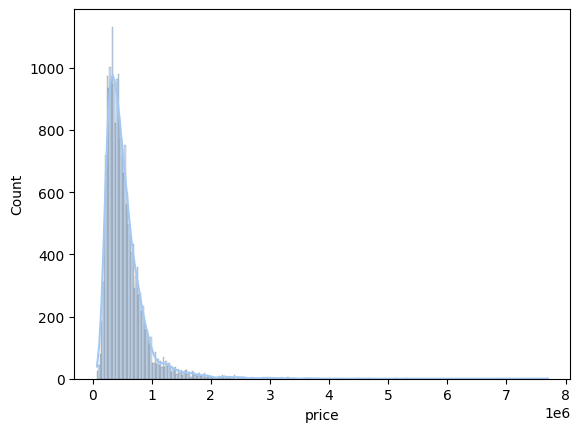

In [15]:
sns.histplot(data=data, x='price', kde=True)

In [16]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Сильное правостороннее смещение, большинство сделок до 1 миллиона, при этом есть очень дорогие и редкие объекты, выбросы, сильно растягивающие график

In [17]:
data['price'].quantile(0.99)

1964400.0000000051

In [18]:
data.query('price > 1964400').shape

(217, 25)

Более 99 перцентиля лишь 217 домов, планка около 2 миллионов. На данный момент все оставим, как есть, а после первичного обучения модели можно будет посмотреть, что сделать:
* лог-трансформация таргета, чтобы снизить влияние выбросов
* ограничение по 99 перцентилю, все цены выше заменим на эту границу
* удалим выбросы

## Дата продажи

Для начала взглянем на общее число продаж по месяцам

<Axes: xlabel='sale_month', ylabel='count'>

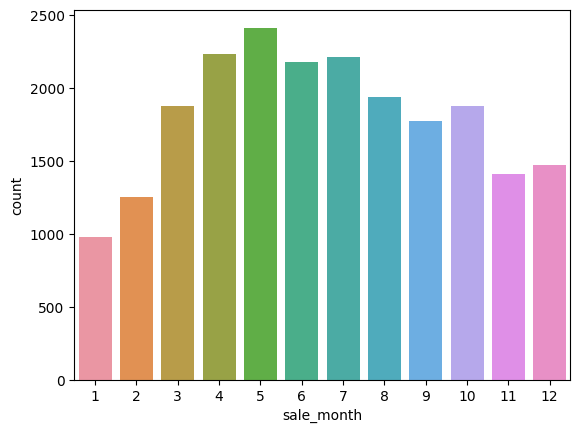

In [19]:
sns.countplot(data=data, x='sale_month')

Сделки начинают активно идти с началом весны, продолжают летом, и падают к ноябрю, не поднимаясь и после новогодних праздников. Снижение спроса в это время может говорить о снижении цены на продажу домов в эти месяцы

<Axes: xlabel='sale_month', ylabel='price'>

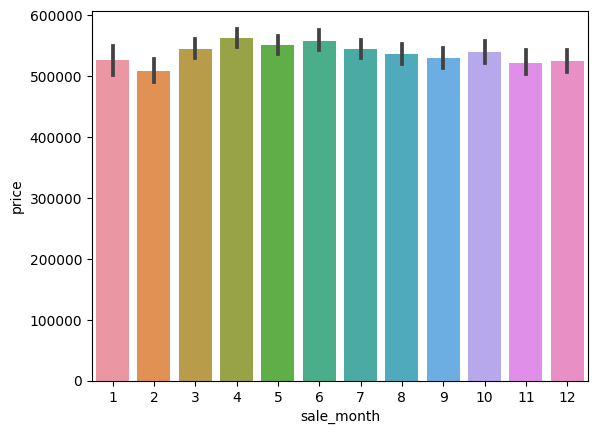

In [20]:
sns.barplot(x='sale_month', y='price', data=data)

* Невысокие показатели в январе и феврале, что может быть связано с низкой активностью рынка после новогодних праздников
* Пик в апреле–мае. В апреле средняя цена достигает максимума, а в мае остаётся на весьма высоком уровне. Это совпадает с наибольшим числом сделок: спрос растёт весной, поднимая цены
* После весеннего пика наблюдается постепенное снижение средней стоимости вплоть до ноября
* Сезонность. Весенний подъём цен и сделок, низкий уровень зимой. Стоит закодировать месяц как циклический признак, чтобы модель уловила этот годовой цикл

<Axes: xlabel='sale_quarter', ylabel='price'>

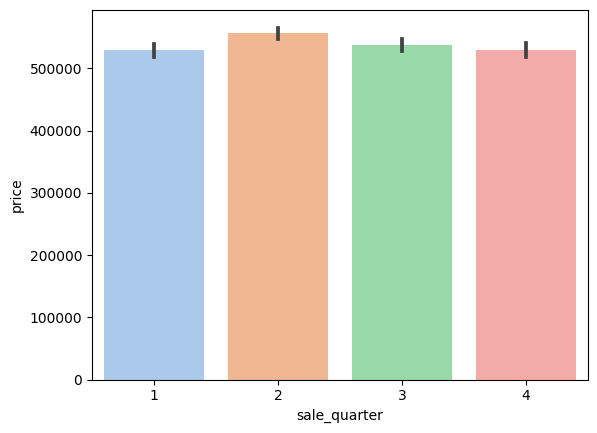

In [21]:
sns.barplot(x='sale_quarter', y='price', data=data)

В графике по кварталам видим менее значительные отличия, но общая картина похожа

In [22]:
data['sale_quarter'].value_counts()

sale_quarter
2    6825
3    5925
4    4760
1    4103
Name: count, dtype: int64

<Axes: xlabel='sale_day', ylabel='price'>

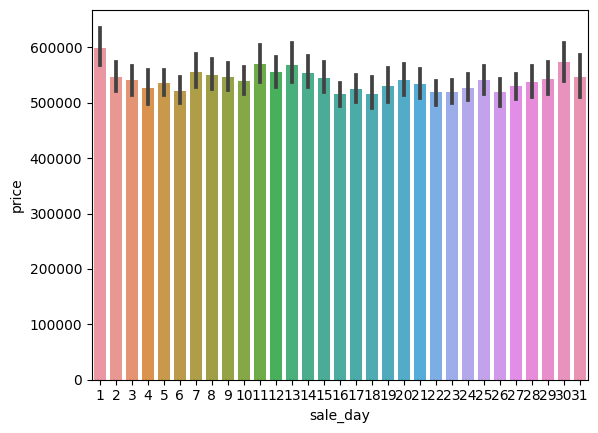

In [23]:
sns.barplot(x='sale_day', y='price', data=data)

Конкретный день продажи не влияет на цену

<Axes: xlabel='sale_day', ylabel='count'>

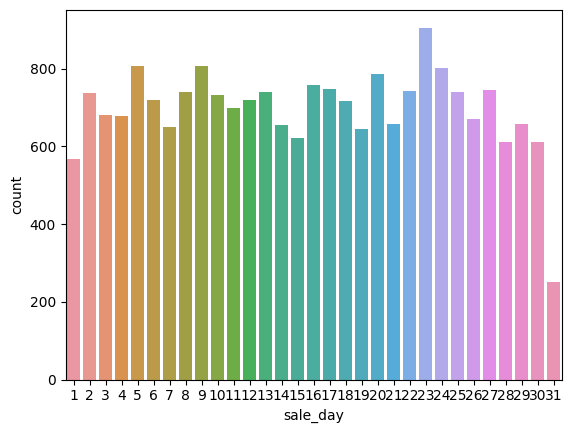

In [24]:
sns.countplot(data=data, x='sale_day')

И по количеству сделок так же, есть видимый пик в 23 число. На 31 приходится меньше сделок, что логично, не во всех месяцах есть эти даты. Что относится и к другим последним датам после 28 числа

<Axes: xlabel='sale_weekday', ylabel='price'>

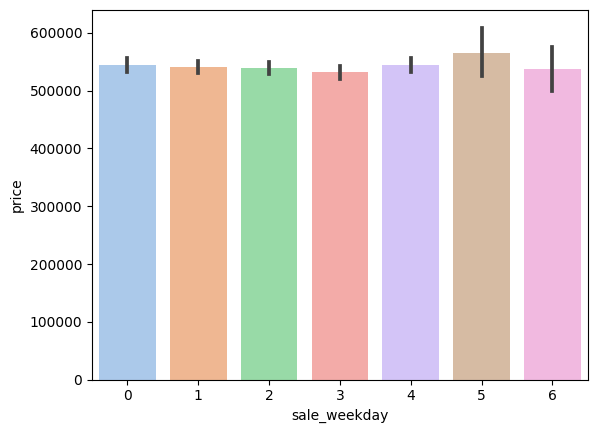

In [25]:
sns.barplot(x='sale_weekday', y='price', data=data)

Заметно небольшое увеличение цены на выходных

<Axes: xlabel='sale_weekday', ylabel='count'>

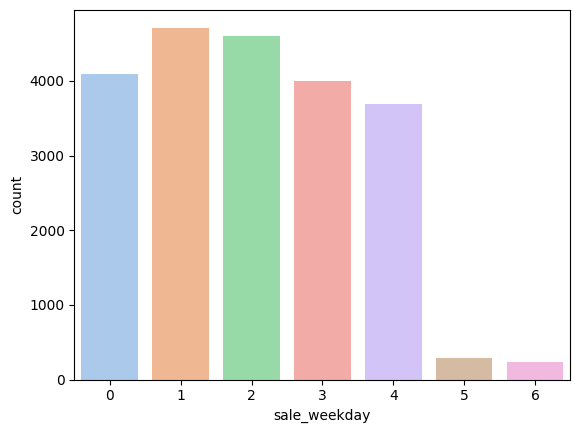

In [26]:
sns.countplot(data=data, x='sale_weekday')

Увидим, что количество продаж в выходные заметно ниже. 

Построим отдельный булевый признак, который говорит, выходной день или нет

In [27]:
data['is_weekend'] = data['sale_weekday'].isin([5, 6]).astype(int)

Так как в продажах была замечена сезонность(зимой ниже, весной выше), переведем дату в точку на окружности, используя функции синуса и косинуса. Таким образом номер месяца станет точкой на окружности, а месяца декабрь и январь (12 и 1) окажутся рядом друг с другом в данных

In [28]:
data['month_sin'] = np.sin(2 * np.pi * data['sale_month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['sale_month'] / 12)

<Axes: xlabel='month_cos', ylabel='price'>

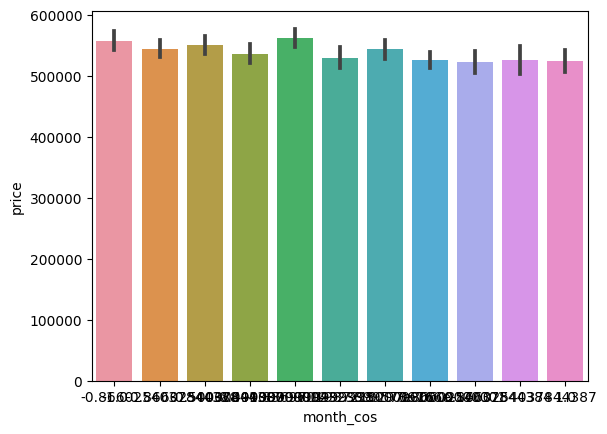

In [29]:
sns.barplot(x='month_cos', y='price', data=data)

<Axes: >

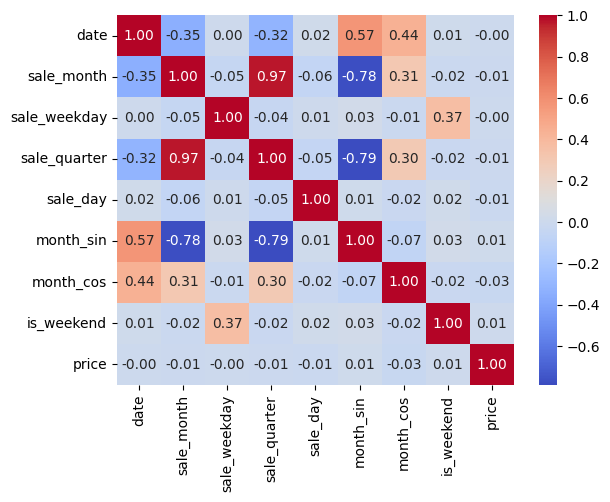

In [30]:
sns.heatmap(data[['date', 'sale_month', 'sale_weekday', 'sale_quarter', 'sale_day', 'month_sin', 'month_cos', 'is_weekend', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

* Корреляция показала слабую связь между временными признаками и ценой
* Вероятно все фичи по дням недели уйдут в итоговой модели и не будут полезны
* Однако month_cos из-за своей цикличности все же показал корреляцию чуть выше, чем остальные признаки

## Анализ площадей

### Площадь дома

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Count'>

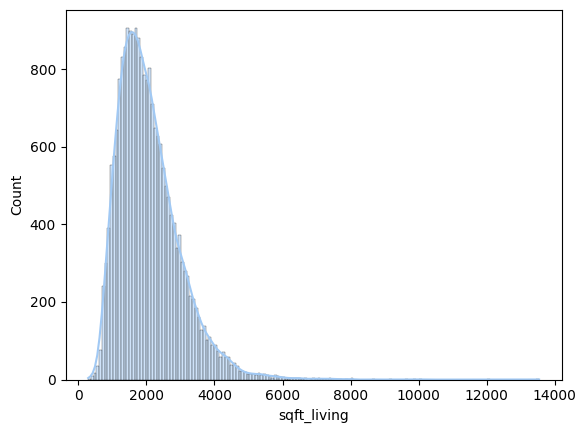

In [31]:
sns.histplot(data=data, x='sqft_living', kde=True)

Большинство домов имеют площадь примерно 1000-3000 sqft, пик плотности приходится на 1900

Рассмотрим отдельно и площадь участка

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Count'>

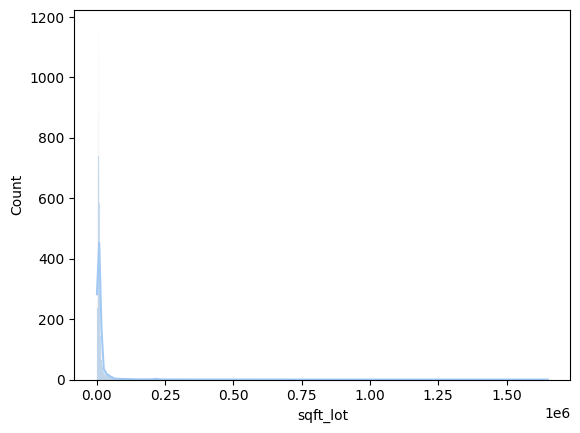

In [32]:
sns.histplot(data=data, x='sqft_lot', kde=True)

Оказалось очень много выбросов, поэтому построим график только для площадей менее 100000 sqft

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Count'>

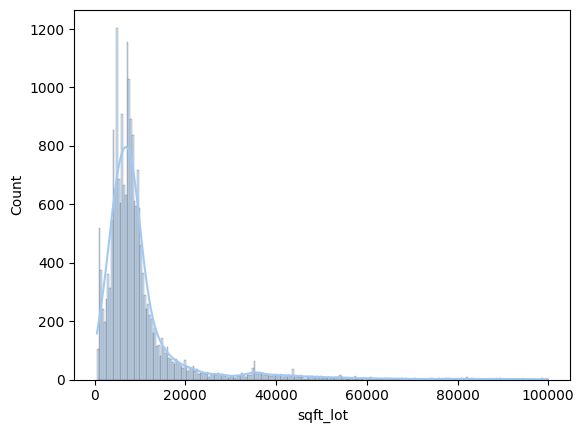

In [33]:
sns.histplot(data=data[data['sqft_lot'] < 100_000], x='sqft_lot', kde=True)

Площадь участка сосредоточена в диапазоне от 3000 до 15000 sqft

In [34]:
data[['sqft_living', 'sqft_lot']].describe()

,sqft_living,sqft_lot
count,21613.000000,2.161300e+04
mean,2079.899736,1.510697e+04
std,918.440897,4.142051e+04
min,290.000000,5.200000e+02
25%,1427.000000,5.040000e+03
50%,1910.000000,7.618000e+03
75%,2550.000000,1.068800e+04
max,13540.000000,1.651359e+06


<Axes: xlabel='sqft_living'>

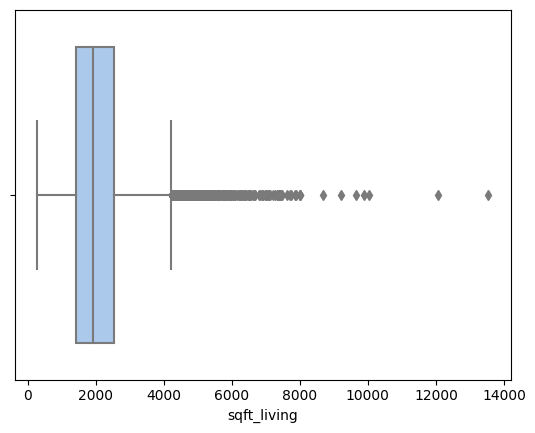

In [35]:
sns.boxplot(data=data, x='sqft_living')

Медиана жилой площади составляет 1910 sqft, IQR от 1427 до 2550, при этом есть много выбросов

<Axes: xlabel='sqft_lot'>

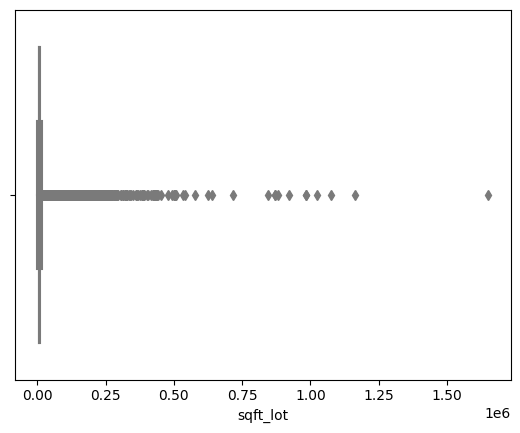

In [36]:
sns.boxplot(data=data, x='sqft_lot')

In [37]:
data['sqft_lot'].quantile(0.9)

21397.599999999995

<Axes: xlabel='sqft_lot'>

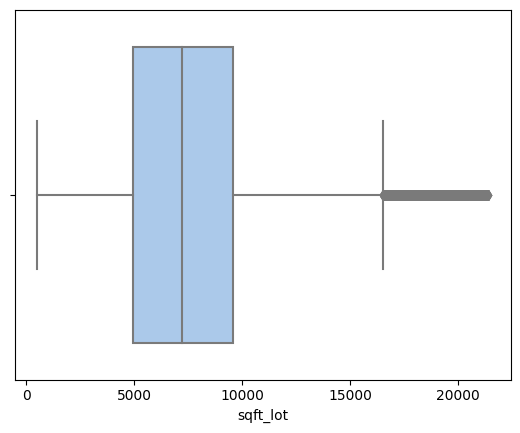

In [38]:
sns.boxplot(data=data.query('sqft_lot < 21397'), x='sqft_lot')

Медиана для площади участка 7600 sqft, также наблюдаем довольно большое число выбросов. IQR от 5000 до 10000

В целом ящики с усами показали, что для обоих признаков есть сотни значений, которые существенно выше усов. Эти значения могут повлиять на метрики моделей. В дальнейшем можно будет поработать с выбросами и тут, преобразовав их

Исследуем зависимость между ценой и площадью дома, тут должна быть довольно сильная корреляция

<Axes: xlabel='sqft_living', ylabel='price'>

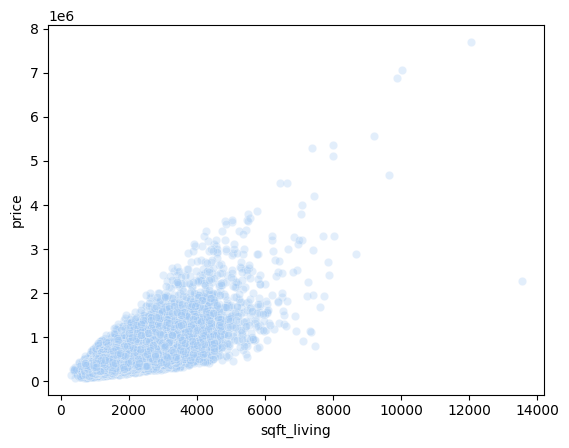

In [39]:
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.3)

Действительно, в среднем с ростом sqft_living, цена тоже растет, маленькие дома(до 1500) стоят до 400k, а крупные(3000-5000) уже до 1 миллиона, а где-то и выше

<Axes: xlabel='sqft_lot', ylabel='price'>

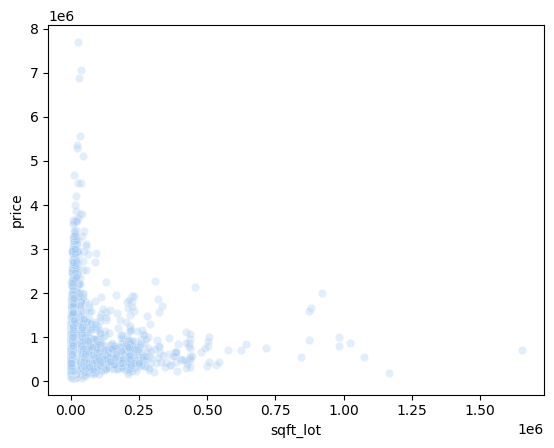

In [40]:
sns.scatterplot(data=data, x='sqft_lot', y='price', alpha=0.3)

<Axes: xlabel='sqft_lot', ylabel='price'>

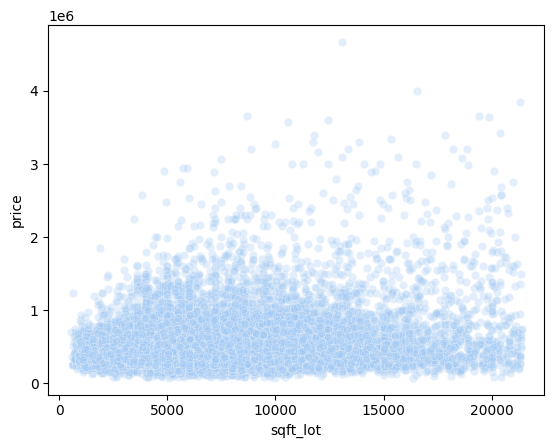

In [41]:
sns.scatterplot(data=data.query('sqft_lot < 21397'), x='sqft_lot', y='price', alpha=0.3)

При этом какой-то зависимости между ценой продажи дома и площадью участка трудно заметить

Для более быстрого построения тепловой карты, чтобы не писать вечно параметры графика, создам функцию

In [42]:
def make_heatmap(data):
    sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

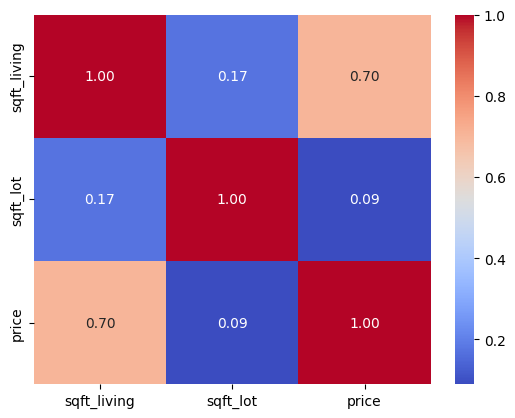

In [43]:
make_heatmap(data[['sqft_living', 'sqft_lot', 'price']])

* И да, оказалось, что между sqft_living и price есть очень сильная положительная связь
* При этом связь между размером участка и ценой крайне низкая и почти не влияет
* Напрямую sqft_lot вряд ли будет использоваться, только дополнительные смежные признаки

### Дома в округе

Идея этих фич в том, чтобы захватить локальный контекст: уровень плотности застройки и типичные размеры домов и участков в окрестностях
* Если средняя жилая площадь соседних 15 домов (sqft_living15) высока, то этот район, вероятно, более престижный и цены на ваш дом тоже будут выше
* Более плотная застройка, т.е. меньшие значения sqft_lot15 могут указывать на локацию с ограниченным пространством, где цена обычно выше
* Сравнение с конкурентами, отношение площади вашего дома к домам рядом показывает, насколько дома выигрывает по сравнению с соседями и может дать бонус к цене
* Если размер участка велик и при этом велик и sqft_lot15, вероятно, что дом может стоить дороже, из-за большего пространства и некой приватности

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living15', ylabel='Count'>

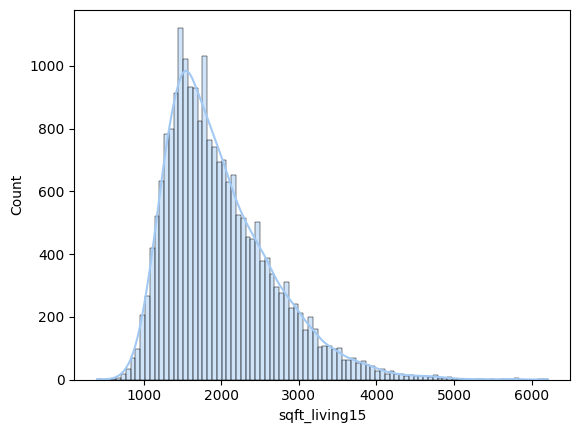

In [44]:
sns.histplot(data=data, x='sqft_living15', kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot15', ylabel='Count'>

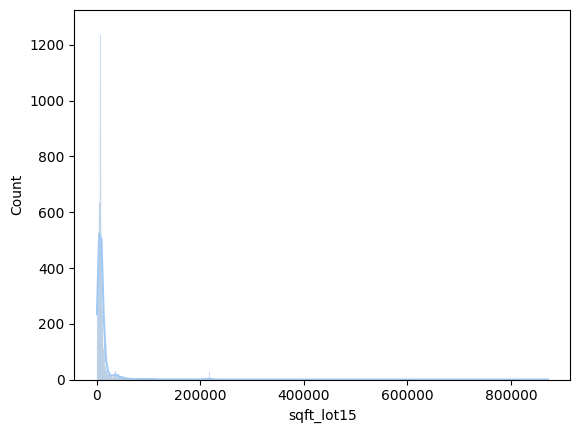

In [45]:
sns.histplot(data=data, x='sqft_lot15',   kde=True)

Распределение графиков крайне похоже на распределение обычных фич sqft_living и sqft_lot

<Axes: xlabel='sqft_living15', ylabel='price'>

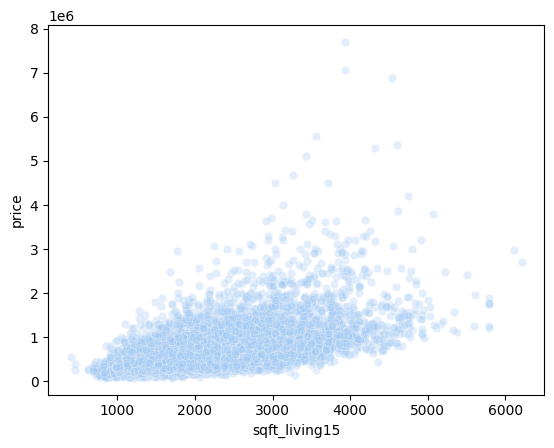

In [46]:
sns.scatterplot(data=data, x='sqft_living15', y='price', alpha=0.3)

При этом по графику зависимости sqft_living15 и price уже нельзя так точно утверждать о наличии явной зависимости между переменными

<Axes: xlabel='sqft_lot15', ylabel='price'>

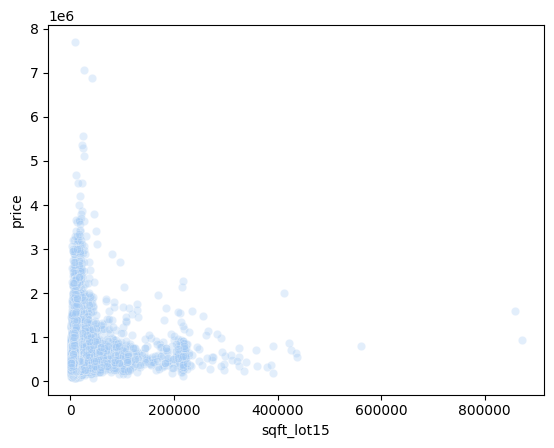

In [47]:
sns.scatterplot(data=data, x='sqft_lot15',    y='price', alpha=0.3)

График выше тоже не говорит о какой-либо зависимости

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='bin_living15', ylabel='price'>

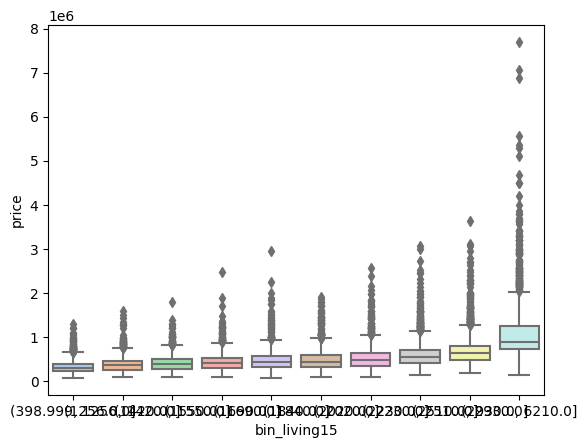

In [48]:
data['bin_living15'] = pd.qcut(data['sqft_living15'], 10)
sns.boxplot(data=data, x='bin_living15', y='price')

По боксплотам заметны выбросы в каждой из категорий, при этом видно, как цена постепенно растет с увеличением площади домов рядом

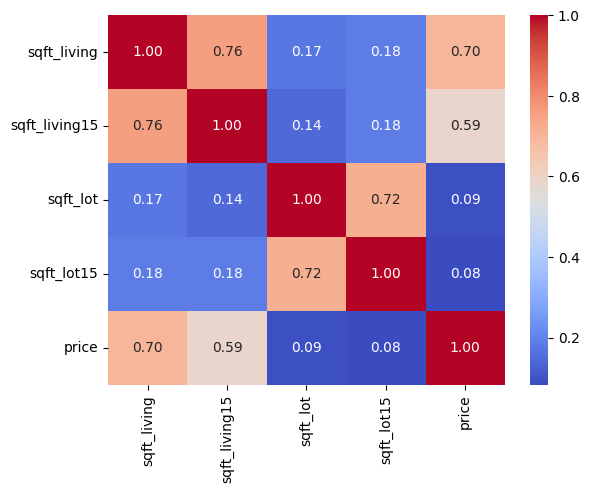

In [49]:
make_heatmap(data[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price']])

* 1 гипотеза о престижности района оправдалась. Если дома рядом с большей площадью,то цена и на ваш дом выше
* 2 гипотез не оправдалась, плотность застройки не повлияла на цену

Для еще двух гипотез создадим два признака:
* соотношение площади дома к площади домов в округе
* соотношение площади участка к площади учатсков в округе